First 5 rows of the dataset:

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Descriptive Statistics:

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std 

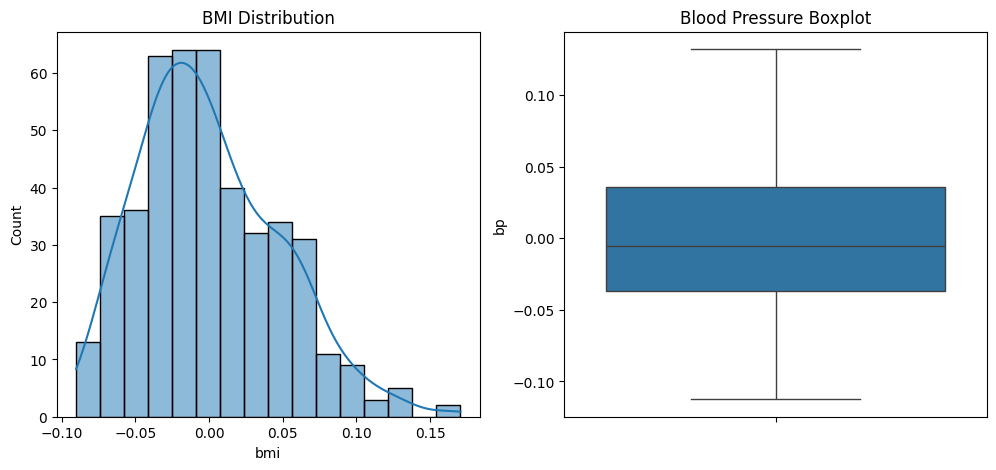

In [1]:
# Milestone 1: Data Understanding & Exploration

from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Display first 5 rows
print("First 5 rows of the dataset:\n")
print(df.head())

# Descriptive statistics
print("\nDescriptive Statistics:\n")
print(df.describe())

# Check for class balance
if 'target' in df.columns:
    print("\nTarget distribution:\n", df['target'].value_counts())

# Visualize distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=df['bp'])
plt.title('Blood Pressure Boxplot')
plt.show()


Missing values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


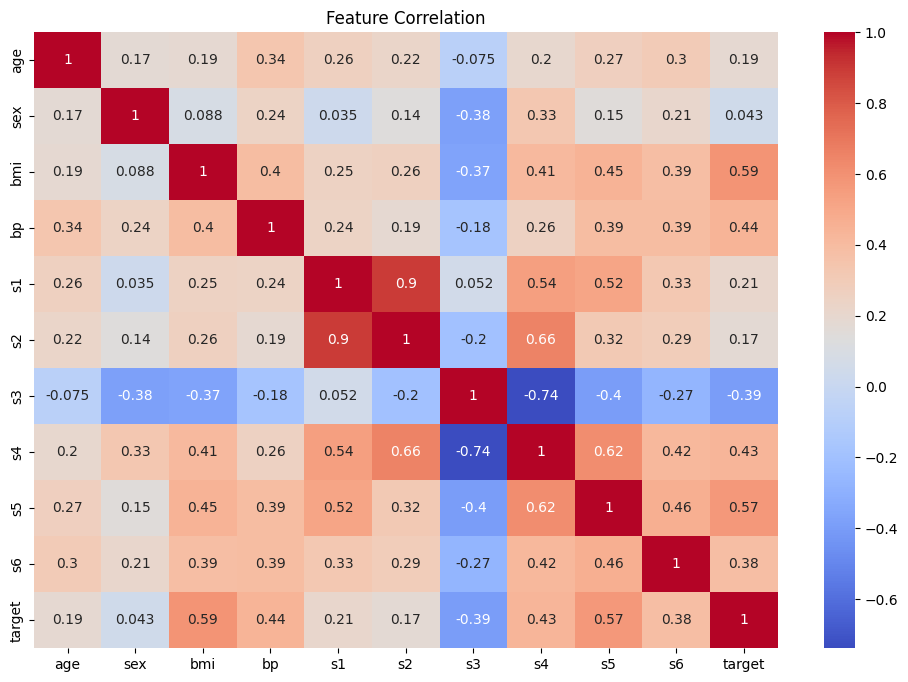


Highly correlated features with target:
 target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: target, dtype: float64


In [2]:
# Milestone 2: Data Preparation & Preprocessing

from sklearn.preprocessing import StandardScaler

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Feature Scaling
features = df.drop(columns='target')
target = df['target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for correlation analysis
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['target'] = target

# Correlation
corr_matrix = df_scaled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Print highly correlated features
high_corr = corr_matrix.abs()['target'].sort_values(ascending=False)
print("\nHighly correlated features with target:\n", high_corr)

In [3]:
# Milestone 3: Model Selection & Training

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Regressor with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators':[50,100], 'max_depth':[None,5,10]}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_


Linear Regression R2: 0.4772897164322617
Linear Regression MSE: 2821.750981001311

Random Forest R2: 0.48533576502881604
Random Forest MSE: 2778.3159344100204


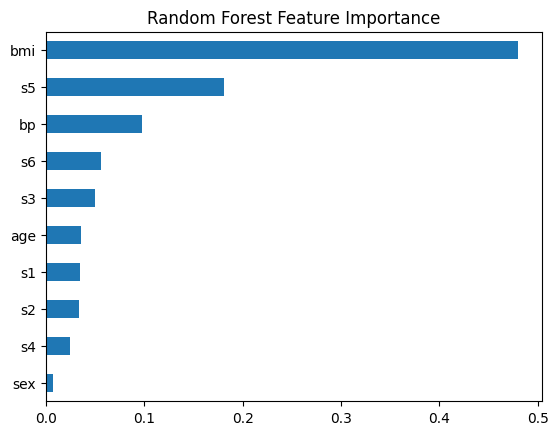

In [4]:
# Milestone 4: Model Evaluation & Interpretation

from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_best.predict(X_test)

# Evaluation Metrics
print("\nLinear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

print("\nRandom Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

# Plot feature importance for Random Forest
importances = rf_best.feature_importances_
feat_importances = pd.Series(importances, index=features.columns)
feat_importances.sort_values().plot(kind='barh', title='Random Forest Feature Importance')
plt.show()


In [5]:
# Milestone 5: Deployment & Reporting

import joblib

# Save the best model
joblib.dump(rf_best, 'diabetes_rf_model.pkl')
print("\nRandom Forest model saved as 'diabetes_rf_model.pkl'")

# Load the model and make a new prediction
loaded_model = joblib.load('diabetes_rf_model.pkl')
sample_input = X_test[:1]  # Taking the first test sample
predicted_value = loaded_model.predict(sample_input)
print("\nPredicted target for first test sample:", predicted_value)


Random Forest model saved as 'diabetes_rf_model.pkl'

Predicted target for first test sample: [158.92771099]
